In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df_vale = pd.read_csv('VALE3.SA.csv', sep=',', decimal='.')
df_vale.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-09-11,37.830002,38.240002,36.849998,37.139999,20.748991,7135400
1,2013-09-12,37.139999,37.240002,36.549999,36.950001,20.642843,3956800
2,2013-09-13,36.990002,36.990002,36.259998,36.500000,20.391439,3666700
3,2013-09-16,36.700001,36.930000,36.209999,36.389999,20.329987,3136200
4,2013-09-17,36.270000,36.540001,35.799999,36.490002,20.385857,3162000


In [61]:
# Converter string date para datetime
df_vale['Date'] = pd.to_datetime(df_vale['Date'])
df_vale.drop(columns=['Low','Adj Close','Volume'], inplace=True)
df_vale.head()

,Date,Open,High,Close
0,2013-09-11,37.830002,38.240002,37.139999
1,2013-09-12,37.139999,37.240002,36.950001
2,2013-09-13,36.990002,36.990002,36.500000
3,2013-09-16,36.700001,36.930000,36.389999
4,2013-09-17,36.270000,36.540001,36.490002


In [62]:
df_vale['Data_Menos_365_dias'] = df_vale['Date'] - pd.Timedelta(days=365)
# Criar coluna com a maior data disponível da coluna 'Date' e menor que a coluna 'Data_Menos_365_dias' para cada linha
df_vale['Data_Menos_365_dias_disponível'] = df_vale['Data_Menos_365_dias'].apply(lambda x: df_vale['Date'][df_vale['Date'] < x].max())
# Criar coluna para o valor de abertura da ação na data da coluna 'Data_Menos_365_dias_disponível' para cada linha menos para linhas com valor NaT na coluna 'Data_Menos_365_dias_disponível'
df_vale['Open_Menos_365_dias_disponível'] = df_vale.apply(lambda x: df_vale['Open'][df_vale['Date'] == x['Data_Menos_365_dias_disponível']].values[0] if pd.notnull(x['Data_Menos_365_dias_disponível']) else None, axis=1)
# Criar nova coluna com o valor máximo da ação 'High' entre a data da coluna 'Data_Menos_365_dias_disponível' e a data da coluna 'Date' para cada linha
df_vale['High_Menos_365_dias_disponível'] = df_vale.apply(lambda x: df_vale['High'][(df_vale['Date'] >= x['Data_Menos_365_dias_disponível']) & (df_vale['Date'] <= x['Date'])].max(), axis=1)
# Criar coluna "Atingiu a Barreira" para valor de High maior que 12% do Open_Menos_365_dias_disponível
df_vale['Atingiu a Barreira?'] = df_vale.apply(lambda x: 1 if x['High_Menos_365_dias_disponível'] > x['Open_Menos_365_dias_disponível'] * 1.45 else 0, axis=1)

def valor_final_valorizacao(row):
    if pd.notna(row['Data_Menos_365_dias_disponível']):
        valorizacao = (row['Close'] - row['Open_Menos_365_dias_disponível']) / row['Open_Menos_365_dias_disponível']
        if valorizacao <= 0:
            return valorizacao
        elif row['Atingiu a Barreira?'] == 0:
            return valorizacao*2
        elif valorizacao < 0.12:
            return valorizacao
        else:
            return 0.12
    else:
        return None
    
df_vale['Valorização'] = df_vale.apply(valor_final_valorizacao, axis=1)

In [63]:
# Excluir coluna 'Valor_Abertura_Data_Disponivel' da tabela
df_vale.drop(columns=['Valor_Abertura_Data_Disponivel'], inplace=True)

KeyError: "['Valor_Abertura_Data_Disponivel'] not found in axis"

In [ ]:
df_vale

,Date,Open,High,Close,Data_Menos_365_dias,Data_Menos_365_dias_disponível,Open_Menos_365_dias_disponível,High_Menos_365_dias_disponível,Atingiu a Barreira?,Valorização
1,2013-09-12,37.139999,37.240002,36.950001,2012-09-12,NaT,NaN,NaN,0,NaN
2,2013-09-13,36.990002,36.990002,36.500000,2012-09-13,NaT,NaN,NaN,0,NaN
3,2013-09-16,36.700001,36.930000,36.389999,2012-09-16,NaT,NaN,NaN,0,NaN
4,2013-09-17,36.270000,36.540001,36.490002,2012-09-17,NaT,NaN,NaN,0,NaN
5,2013-09-18,36.389999,36.680000,36.529999,2012-09-18,NaT,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...
2479,2023-09-01,66.690002,69.000000,68.889999,2022-09-01,2022-08-31,65.419998,98.290001,1,0.053042
2480,2023-09-04,69.279999,70.050003,69.400002,2022-09-04,2022-09-02,64.489998,98.290001,1,0.076136
2481,2023-09-05,68.989998,69.510002,69.099998,2022-09-05,2022-09-02,64.489998,98.290001,1,0.071484
2482,2023-09-06,69.150002,69.589996,67.989998,2022-09-06,2022-09-05,64.449997,98.290001,1,0.054926


In [ ]:
# Exportar para csv
df_vale.to_csv('vale3_valorizacao.csv', sep=';', decimal=',', index=False)

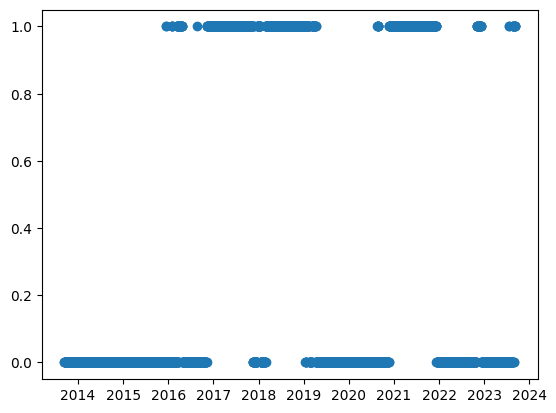

In [ ]:
plt.scatter(df_vale['Date'], df_vale['Atingiu a Barreira?'])
plt.show()

In [ ]:
# Importar taxa SELIC removendo a primeira linha
df_selic = pd.read_csv('taxa_selic_apurada.csv', sep=';', decimal=',', skiprows=1)
# Coverter taxa SELIC para decimal
df_selic['Taxa (% a.a.)'] = df_selic['Taxa (% a.a.)']/100
# Converter string Data para datetime
df_selic['Data'] = pd.to_datetime(df_selic['Data'], format='%d/%m/%Y')

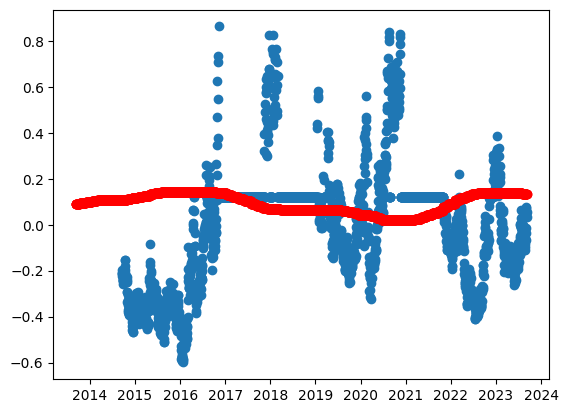

In [ ]:
plt.scatter(df_vale['Date'], df_vale['Valorização'])
plt.scatter(df_selic['Data'], df_selic['Taxa (% a.a.)'], color='red')
plt.show()

In [ ]:
# Print de média de valorização para 1, 2, 3, 4, 5, 6, 7, 8 e 9 anos
print('Média de valorização para 1 ano: ', df_vale['Valorização'][df_vale['Date'] >= '2022-09-11'].mean())
print('Média de valorização para 2 anos: ', df_vale['Valorização'][df_vale['Date'] >= '2021-09-11'].mean())
print('Média de valorização para 3 anos: ', df_vale['Valorização'][df_vale['Date'] >= '2020-09-11'].mean())
print('Média de valorização para 4 anos: ', df_vale['Valorização'][df_vale['Date'] >= '2019-09-11'].mean())
print('Média de valorização para 5 anos: ', df_vale['Valorização'][df_vale['Date'] >= '2018-09-11'].mean())
print('Média de valorização para 6 anos: ', df_vale['Valorização'][df_vale['Date'] >= '2017-09-11'].mean())
print('Média de valorização para 7 anos: ', df_vale['Valorização'][df_vale['Date'] >= '2016-09-11'].mean())
print('Média de valorização para 8 anos: ', df_vale['Valorização'][df_vale['Date'] >= '2015-09-11'].mean())
print('Média de valorização para 9 anos: ', df_vale['Valorização'][df_vale['Date'] >= '2014-09-11'].mean())


Média de valorização para 1 ano:  -0.03091738257471935
Média de valorização para 2 anos:  -0.08113792621170873
Média de valorização para 3 anos:  0.014824861259835308
Média de valorização para 4 anos:  0.029511454694825964
Média de valorização para 5 anos:  0.03763631196929466
Média de valorização para 6 anos:  0.06679791824467035
Média de valorização para 7 anos:  0.07404184374415132
Média de valorização para 8 anos:  0.03377594273933283
Média de valorização para 9 anos:  -0.008283713149401073
